### train 1k와 test 1k <- SVMm

In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
import pandas as pd
train = pd.read_csv("../Data/train_1k.csv",header=None)
test = pd.read_csv("../Data/test_1k.csv",header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
train[0].describe()

count    1001.000000
mean        4.447552
std         2.883313
min         0.000000
25%         2.000000
50%         4.000000
75%         7.000000
max         9.000000
Name: 0, dtype: float64

In [43]:
# train[0]의 숫자 빈도
train[0].value_counts()

7    117
1    116
4    105
9    100
2     99
0     98
6     94
3     93
5     92
8     87
Name: 0, dtype: int64

In [44]:
train_data = train.iloc[:,1:] #(=train.loc[:,train.columns != 0])
train_label = train.iloc[:,0] #(=train.loc[:,train.columns == 0])

In [45]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
train_label.head()

0    5
1    0
2    4
3    1
4    9
Name: 0, dtype: int64

In [47]:
# train data의 내용 보기
import numpy as np

temp = np.array(train.loc[0,train.columns != 0])
#print(temp.reshape(28,22))

In [48]:
#train data의 내용 줄여보기 
tempColumns = []
temp1 = temp.reshape(28,28)
count = 0 

for i in range(0,29):
    if i %2 ==1:
        for j in range(0,29):
            if j % 2 == 1:
                tempColumns.append(temp1[i,j])
                count+=1
count

196

In [49]:
print(np.array(tempColumns).reshape(14,14))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  18  18 136  26 255 127   0   0]
 [  0   0   0  49 253 253 253 253 251  82  56   0   0   0]
 [  0   0   0   0 156 253 205   0 154   0   0   0   0   0]
 [  0   0   0   0   0 139 190   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 241 160   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0 186 253  27   0   0   0   0]
 [  0   0   0   0   0   0   0   0 249 249   0   0   0   0]
 [  0   0   0   0   0   0 148 253 253 182   0   0   0   0]
 [  0   0   0   0  66 253 253 198   2   0   0   0   0   0]
 [  0   0 172 253 253 244  11   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0]]


In [50]:
test_data = test.loc[:,test.columns != 0]
test_label = test.loc[:,test.columns == 0]
test_label.head()

,0
0,7
1,2
2,1
3,0
4,4


In [51]:
# 학습하기 
from sklearn import svm
clf = svm.SVC()
clf.fit(train_data,train_label)

SVC()

In [52]:
clf.score(test_data,test_label)

0.8751248751248751

In [53]:
# 시각화를 통한 Log의 필요성 확인
import matplotlib.pyplot as plt

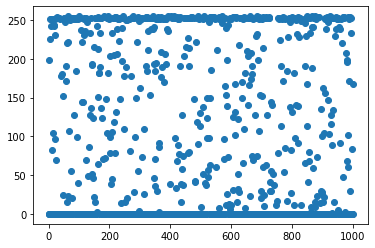

In [54]:
plt.scatter(train_data.index,train_data[300])
plt.show()

### 로그 변환 이유
로그는 태생적으로 큰 값을 작게 표기하기 위해 고안된 방법이며, 측정단위를 키우는 것만으로도 해결하지 못 한 부분을 해결해준다.

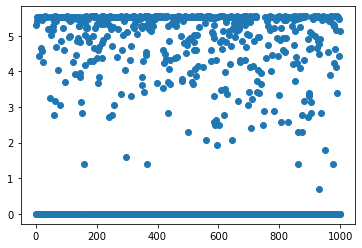

In [55]:
plt.scatter(train_data.index, np.log1p(train_data[300]))
plt.show()

### np.log1p
기본적으로 log안의 x값은 양수만 가능하다.    
하지만 0에 가까운 아주 작은 양수(예:0.00000000001)는 음의 무한대에 가까워지게 된다. (-inf)    
이를 방지하기위해 1을 더함으로써 0보다 큰 양수의 값을 갖게된다.

In [56]:
# 데이터 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
test_data = pd.DataFrame(np.log1p(test_data))

In [58]:
# 학습하기
clf = svm.SVC()
clf.fit(train_data,train_label)

SVC()

In [59]:
clf.score(test_data,test_label)

0.8901098901098901

In [60]:
train_10k = pd.read_csv("../Data/train_10k.csv")

In [61]:
train_10k_data = train_10k.iloc[:,1:]
train_10k_label = train_10k.iloc[:,0]

In [62]:
train_10k_data.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
train_10k_label.head()

0    0
1    4
2    1
3    9
4    2
Name: 5, dtype: int64

In [64]:
test = pd.read_csv("../Data/test_1k.csv")
test_data = test.iloc[:,1:]
test_label = test.iloc[:,0]

In [65]:
clf = svm.SVC()
clf.fit(train_10k_data,train_10k_label)

SVC()

In [66]:
clf.score(test_data,test_label)

0.947

In [67]:
train_10k_data = pd.DataFrame(np.log1p(train_10k_data))

In [68]:
test_data = pd.DataFrame(np.log1p(test_data))

In [69]:
clf = svm.SVC()
clf.fit(train_10k_data,train_10k_label)

SVC()

In [70]:
clf.score(test_data,test_label)

0.958

In [71]:
train_20k = pd.read_csv("../Data/train_20k.csv")
train_20k_data = train_20k.iloc[:,1:]
train_20k_label = train_20k.iloc[:,0]

In [72]:
test = pd.read_csv("../Data/test_1k.csv")
test_data = test.iloc[:,1:]
test_label = test.iloc[:,0]

In [73]:
clf = svm.SVC()
clf.fit(train_20k_data,train_20k_label)

SVC()

In [74]:
clf.score(test_data,test_label)

0.964

In [75]:
train_20k_data = pd.DataFrame(np.log1p(train_20k_data))
test_data = pd.DataFrame(np.log1p(test_data))

In [76]:
clf = svm.SVC()
clf.fit(train_20k_data,train_20k_label)

SVC()

In [77]:
clf.score(test_data,test_label)

0.965